In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import datetime

from dsmanipulator import dsanalyzer as dsa
from dsmanipulator import dsloader as dsl
from dsmanipulator import dscreator as dsc
from dsmanipulator.dataobjects import FileColumnNames

from matplotlib.axes import Axes
from dsmanipulator.dataobjects import Direction, FileColumnNames, Station
from bidict import bidict
from matplotlib.dates import DateFormatter, AutoDateLocator

fcn = FileColumnNames("TimeStamp", "Relative Time", "srcIP", "dstIP", "srcPort", "dstPort")

filename = "../data/normal-traffic.csv"

dialect = dsl.detect_dialect(filename)
df = dsl.load_data(
    filename,
    data_types={
        "TimeStamp": "datetime",
        "Relative Time": "float",
        "srcIP": "object",
        "dstIP": "object",
        "srcPort": "float",
        "dstPort": "float",
        "ipLen": "float",
        "len": "float",
        "fmt": "object",
        "uType": "object",
        "asduType": "float",
        "numix": "float",
        "cot": "float",
        "oa": "float",
        "addr": "float",
        "ioa": "object",
    },
    dialect=dialect,
    row_limit=None,
)

# print(df.columns)

dsc.add_relative_days(df, fcn, inplace=True)
station_ids = dsc.create_station_ids(df, fcn)
dsc.add_station_id(df, fcn, station_ids, inplace=True)
pair_ids = dsc.create_pair_ids(df, fcn)
dsc.add_pair_id(df, fcn, pair_ids, inplace=True)
direction_ids = dsc.create_direction_ids(df, fcn)
dsc.add_direction_id(df, fcn, direction_ids, inplace=True)

,TimeStamp,Relative Time,srcIP,dstIP,srcPort,dstPort,ipLen,len,fmt,uType,...,numix,cot,oa,addr,ioa,*Relative Day##,*Source station id##,*Destination station id##,*Pair id##,*Direction id##
0,2022-05-07 14:41:44.980,7.988096,192.168.11.111,192.168.11.248,61254.0,2404.0,46.0,4.0,0x00000003,0x00000001,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
1,2022-05-07 14:41:44.980,7.988457,192.168.11.248,192.168.11.111,2404.0,61254.0,46.0,4.0,0x00000003,0x00000002,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
2,2022-05-07 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404.0,61254.0,90.0,21.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,67,0,1,0,0,0
3,2022-05-07 14:41:45.190,8.191193,192.168.11.248,192.168.11.111,2404.0,61254.0,90.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,0,1,0,0,0
4,2022-05-07 14:41:48.470,11.477121,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58925,2022-05-10 10:36:32.950,244495.958036,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0
58926,2022-05-10 10:36:34.970,244497.977239,192.168.11.111,192.168.11.248,61254.0,2404.0,46.0,4.0,0x00000001,NaN,...,NaN,NaN,NaN,NaN,NaN,3,0,1,0,1
58927,2022-05-10 10:36:35.750,244498.756241,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0
58928,2022-05-10 10:36:43.550,244506.557115,192.168.11.248,192.168.11.111,2404.0,61254.0,67.0,25.0,0x00000000,NaN,...,1.0,3.0,0.0,65535.0,2,3,1,0,0,0


[]

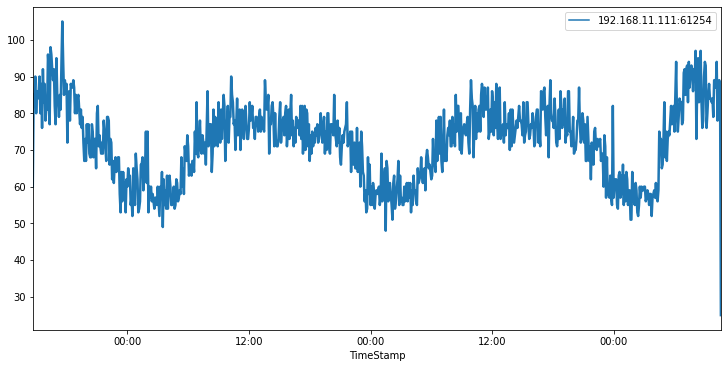

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10, 5),constrained_layout = True)


start = df[fcn.timestamp].iloc[0]
end = df[fcn.timestamp].iloc[-1]

ax.set_xlim([start, end])

delta = datetime.timedelta(minutes=5)


# dsa.plot_pair_flow(
#     df, fcn, ax, 0, station_ids, direction_ids, delta
# )

dsa.plot_slaves(df, fcn, ax, delta, 1, station_ids, pair_ids)

plt.savefig('pgf/normal_pair.pgf')
plt.plot()


[]

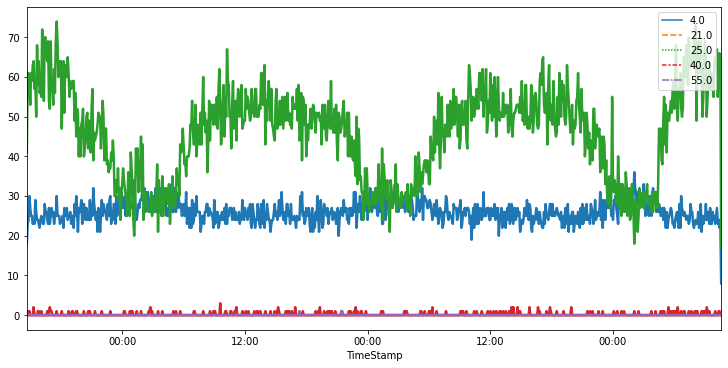

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10, 5),constrained_layout = True)


start = df[fcn.timestamp].iloc[0]
end = df[fcn.timestamp].iloc[-1]

ax.set_xlim([start, end])

delta = datetime.timedelta(minutes=5)


dsa.plot_attribute_values(df, fcn, 'len', delta, ax)

plt.savefig('pgf/normal_numix.pgf')
plt.plot()


In [8]:
df.corr()

,Relative Time,srcPort,dstPort,ipLen,len,asduType,numix,cot,oa,addr,*Relative Day##,*Source station id##,*Destination station id##,*Pair id##,*Direction id##
Relative Time,1.000000,-0.002262,0.002262,0.005626,0.005769,0.008744,0.000694,NaN,NaN,NaN,0.953262,0.002262,-0.002262,NaN,-0.002262
srcPort,-0.002262,1.000000,-1.000000,-0.900206,-0.900282,NaN,NaN,NaN,NaN,NaN,0.009003,-1.000000,1.000000,NaN,1.000000
dstPort,0.002262,-1.000000,1.000000,0.900206,0.900282,NaN,NaN,NaN,NaN,NaN,-0.009003,1.000000,-1.000000,NaN,-1.000000
ipLen,0.005626,-0.900206,0.900206,1.000000,0.999897,-0.106045,0.988611,NaN,NaN,NaN,-0.015527,0.900206,-0.900206,NaN,-0.900206
len,0.005769,-0.900282,0.900282,0.999897,1.000000,0.019088,0.999825,NaN,NaN,NaN,-0.015393,0.900282,-0.900282,NaN,-0.900282
asduType,0.008744,NaN,NaN,-0.106045,0.019088,1.000000,0.000373,NaN,NaN,NaN,0.008308,NaN,NaN,NaN,NaN
numix,0.000694,NaN,NaN,0.988611,0.999825,0.000373,1.000000,NaN,NaN,NaN,0.001948,NaN,NaN,NaN,NaN
cot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
